In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
import numpy as np

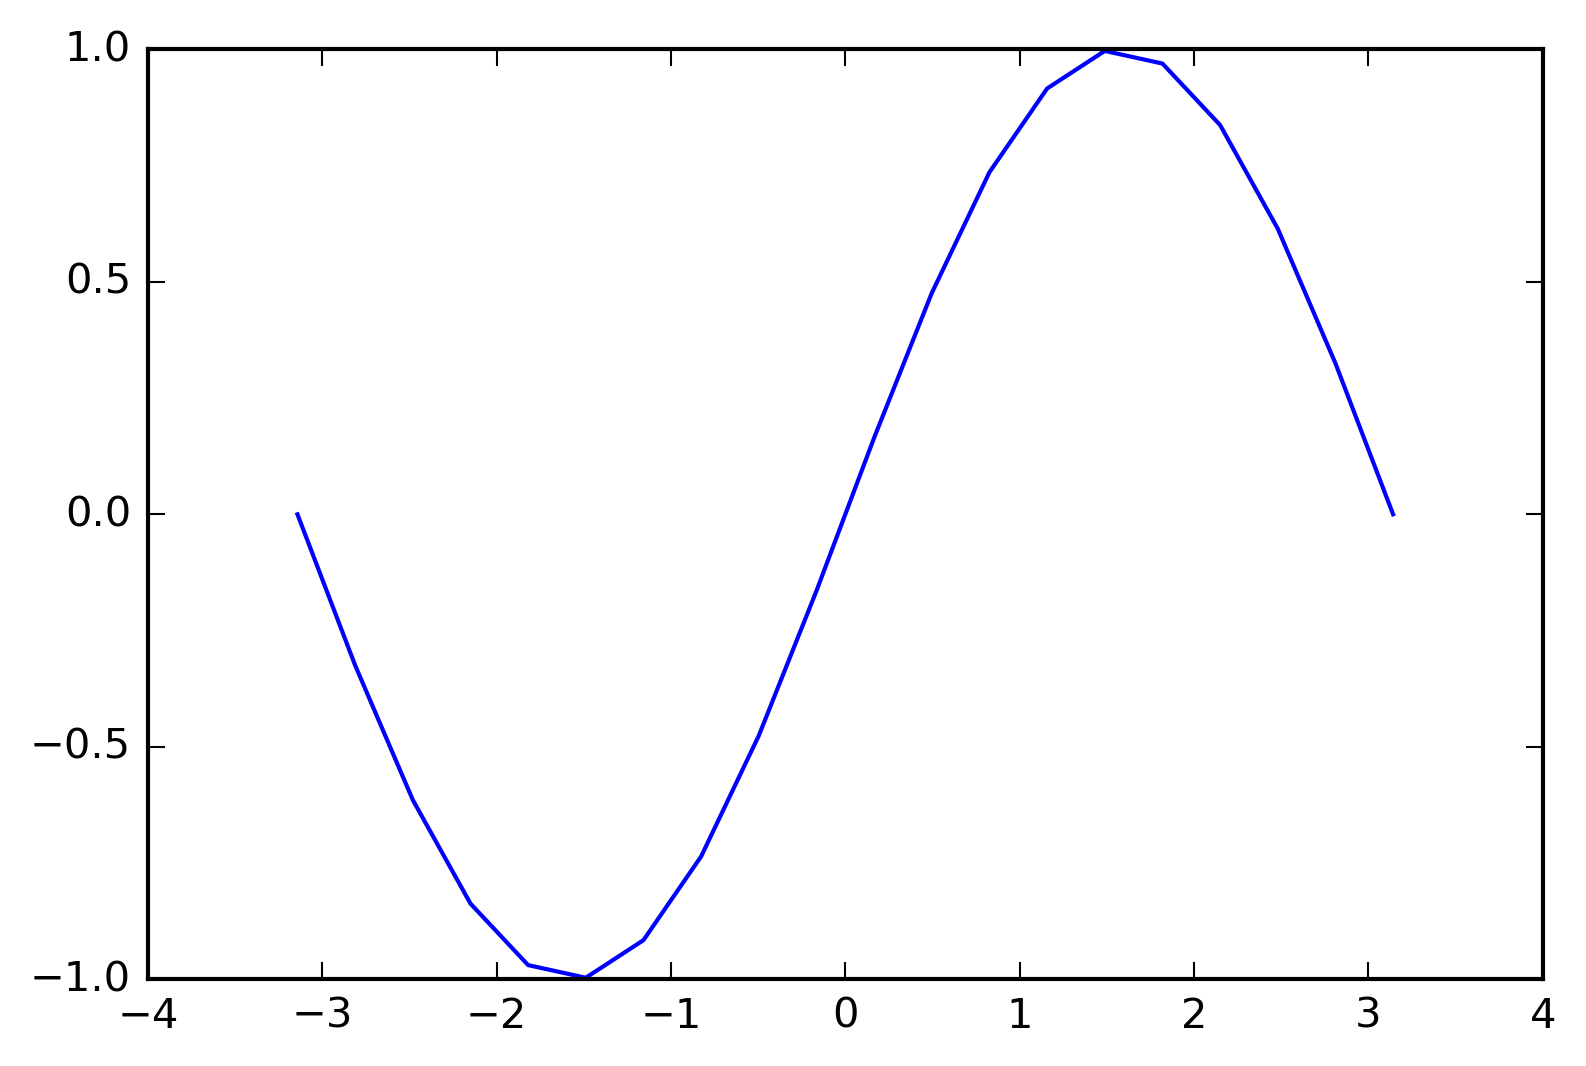

In [17]:
%matplotlib inline
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 300
#test if inline works for notebook
x=np.linspace(start=-np.pi,stop=np.pi,num=20,endpoint=True)
y=np.sin(x)
plt.plot(x,y)

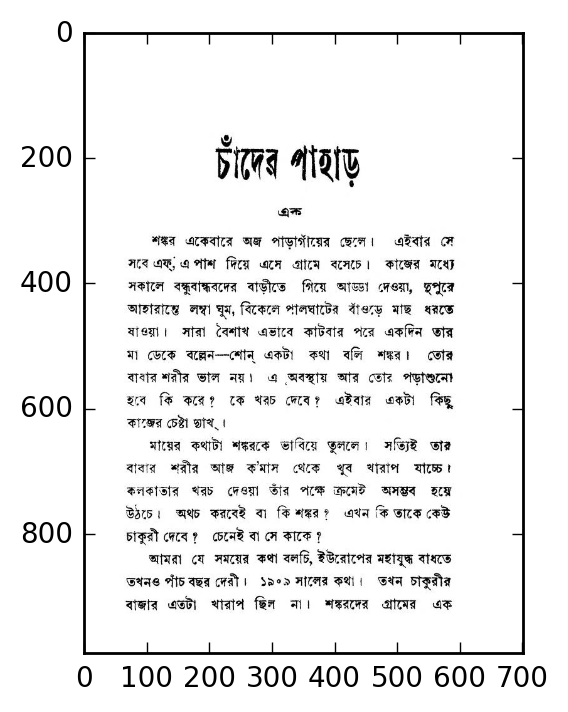

In [3]:
# second arg - {=0: B/W ; >0: 3-color channels ; <0: any-channel-size }
img=cv2.imread("W4Pio.jpg",0)
# image expressed as a 2D array of integers in 0-255
vmin,vmax=(0,255)
plt.imshow(img,cmap=plt.get_cmap("gray"),vmin=vmin,vmax=vmax)

In [4]:
import operator as op
def image_subplots(imagelist,fig, size=None):
    if size:
        assert len(imagelist)==reduce(op.mul,size)
    else:
        size=(len(imagelist),1)
    for index,img in zip(range(len(imagelist)),imagelist):
        fig.add_subplot(size[0],size[1],index+1)
        plt.imshow(img,cmap=plt.get_cmap("gray"))

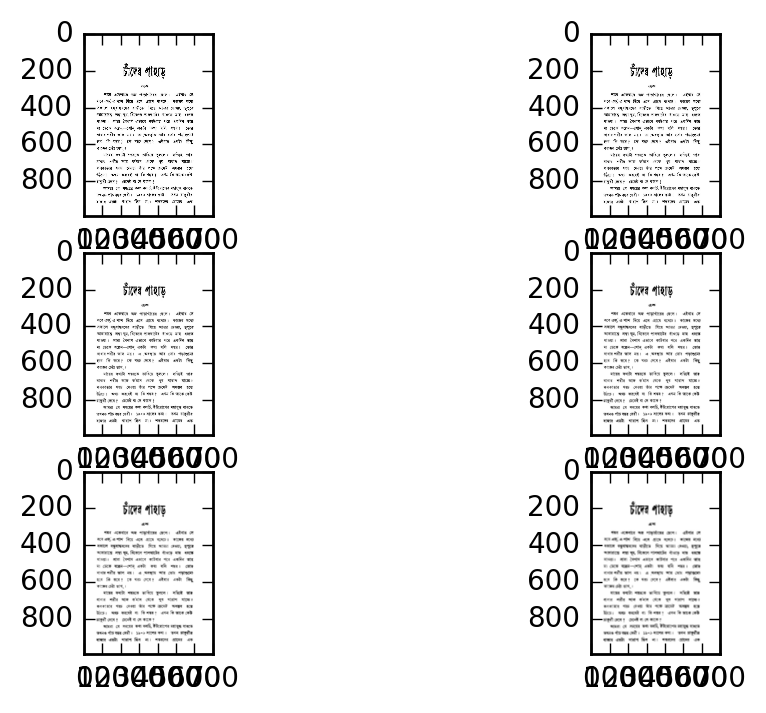

In [5]:
imglist=[cv2.blur(img,(i,i)) for i in [1,2,4,6,8,10]]
fig=plt.figure()
image_subplots(imglist,fig,size=(3,2))
plt.show()

In [6]:
img.shape

(991, 701)

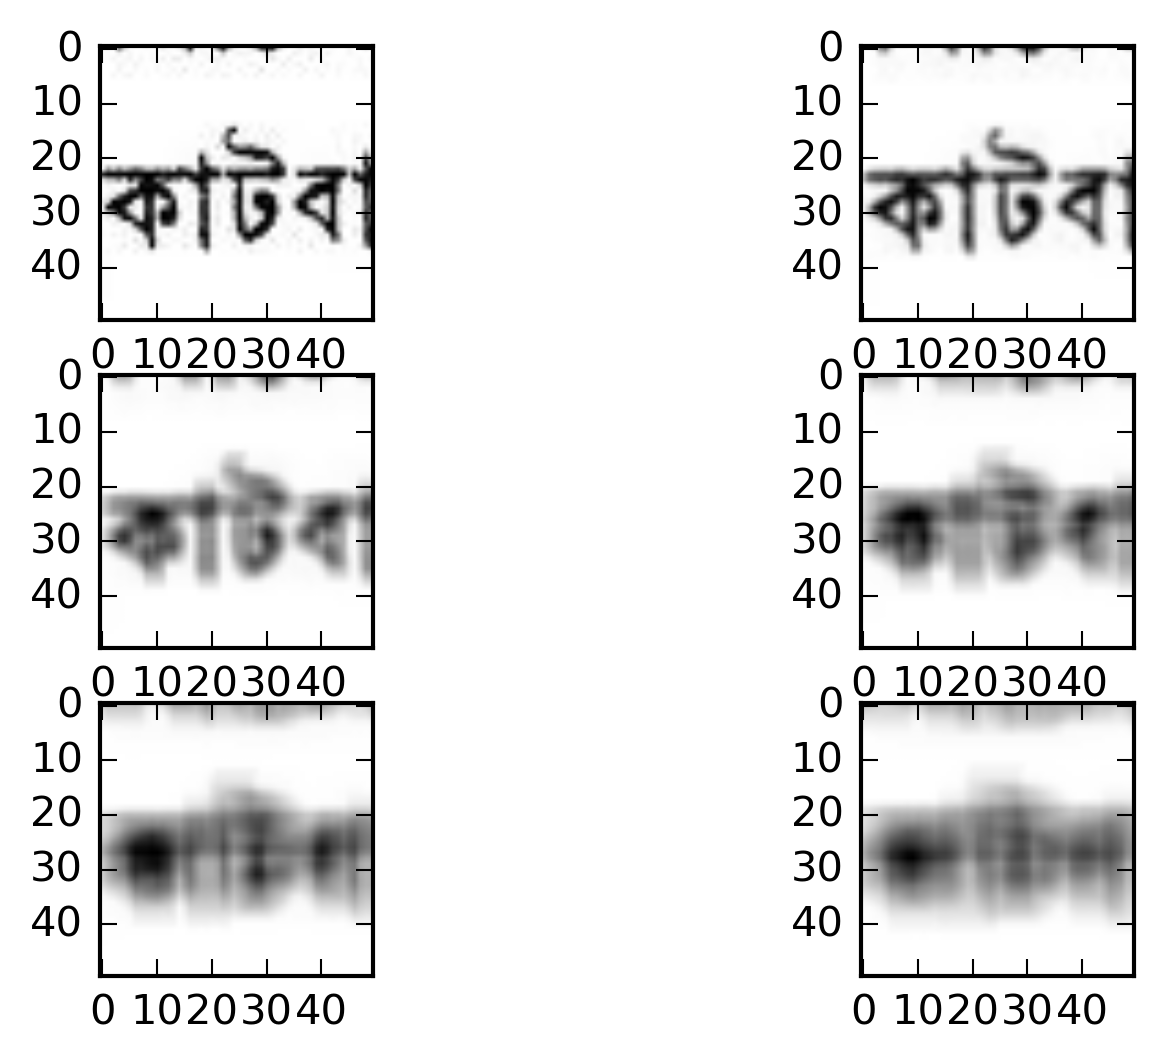

In [19]:
fig=plt.figure()
imgcroplist=[img[450:500,350:400] for img in imglist]
image_subplots(imgcroplist,fig,size=(3,2))
plt.show()

In [22]:
threshlist=[cv2.THRESH_BINARY,cv2.THRESH_BINARY_INV,cv2.THRESH_OTSU,cv2.THRESH_TOZERO,
            cv2.THRESH_TOZERO_INV,cv2.THRESH_TRUNC]
imginput=imgcroplist[1]
imgthreshlist=[imginput]+[cv2.threshold(imginput,thresh=100,maxval=255,type=thresh)[1] for thresh in threshlist]
titlelist=['ORIGINAL','cv2.THRESH_BINARY','cv2.THRESH_BINARY_INV','cv2.THRESH_OTSU',
           'cv2.THRESH_TOZERO','cv2.THRESH_TOZERO_INV','cv2.THRESH_TRUNC']

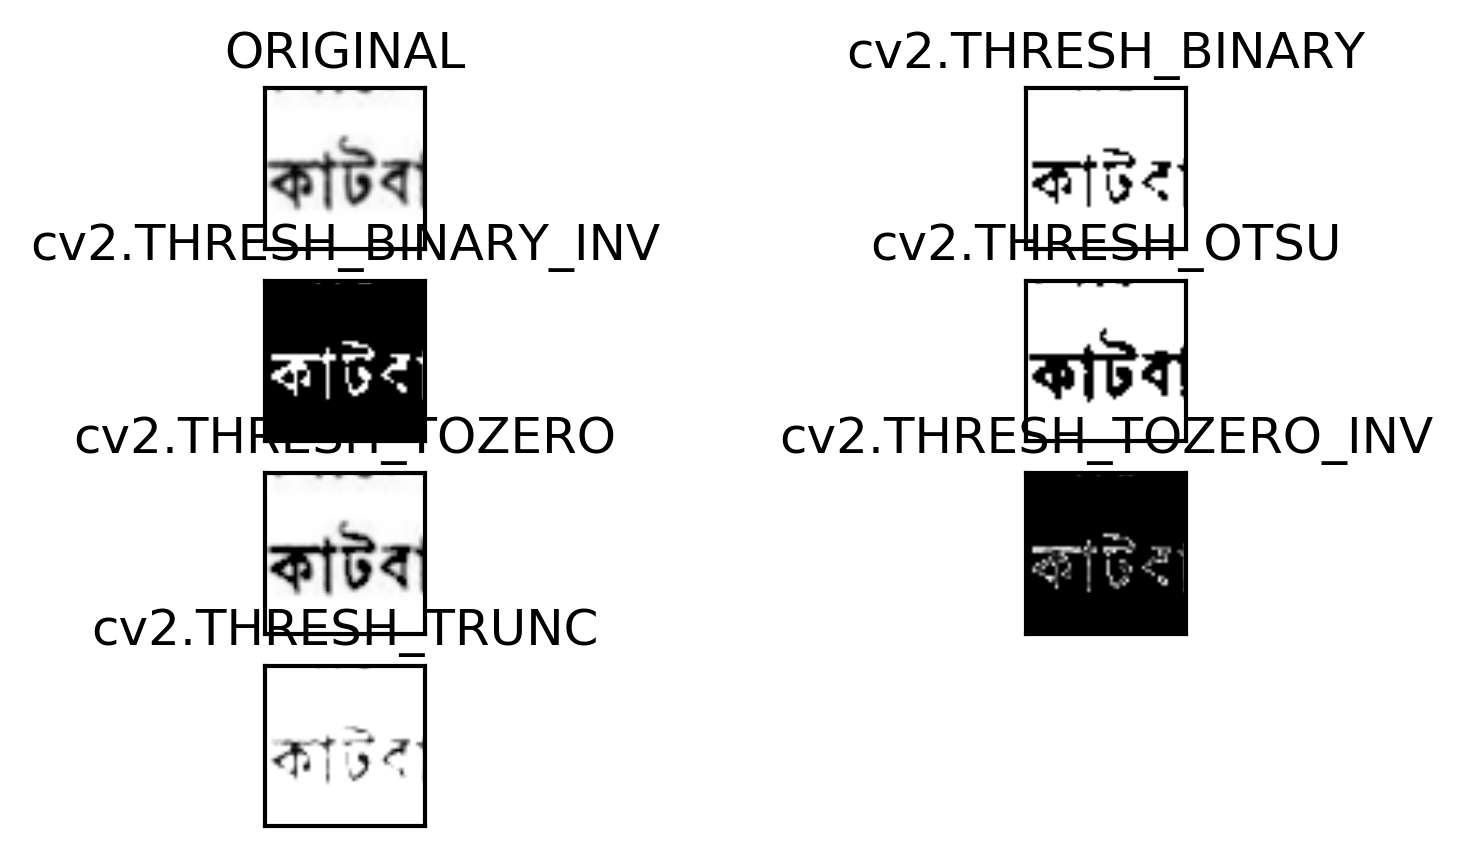

In [23]:
for i in range(len(titlelist)):
    plt.subplot(5,2,i+1), plt.imshow(imgthreshlist[i],'gray')
    plt.title(titlelist[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()